In [150]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


Defining problem

 In the problem they are not given any thing to find. So let assume Survived as Y remaining datas as X.

#Reading Dataset

In [96]:
TrainData = pd.read_csv('Titanic_train.csv')
TrainData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
#Getting info about the dataset
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
#We have Null values in Age,cabin and Embarked.

EDA
---

In [70]:
TrainData.shape

(891, 12)

In [97]:
# In the dataset by generally we can understand  PassengerId and Name is not needed to find the Y so will drop them.
# Cabin is having lots of null values. we cant fill those values by mode here so lets drop that also.
# Ticket column is having some string values we cant convert string to float so drop that also
TrainData = TrainData.drop(["PassengerId","Name","Cabin","Ticket"], axis=1)
TrainData

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [72]:
#Lets check values counts in remaining columns
TrainData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [98]:
#We have suffiecent X data to predict Y we can drop all nul values rows
TrainData = TrainData.dropna()
TrainData.shape

(712, 8)

In [74]:
# Finding the no of catogeries data persent in Sex and Embarked column
TrainData['Sex'].unique()


array(['male', 'female'], dtype=object)

In [99]:
# Convert 'Sex' column to binary values
TrainData['Sex'] = TrainData['Sex'].map({'male': 0, 'female': 1})
TrainData

C:\Users\gjernes\AppData\Local\Temp\ipykernel_21276\4060594635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TrainData['Sex'] = TrainData['Sex'].map({'male': 0, 'female': 1})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,Q
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
889,1,1,0,26.0,0,0,30.0000,C


In [76]:
# Finding the no of catogeries data persent in Sex and Embarked column
TrainData['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [100]:
# Convert 'Embarked' column to binary values
TrainData['Embarked'] = TrainData['Embarked'].map({'S': 0, 'C': 1, 'Q':2})
TrainData

C:\Users\gjernes\AppData\Local\Temp\ipykernel_21276\4117107565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TrainData['Embarked'] = TrainData['Embarked'].map({'S': 0, 'C': 1, 'Q':2})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,2
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
889,1,1,0,26.0,0,0,30.0000,1


In [102]:
# Rearrange the columns
TrainData = pd.DataFrame(TrainData, columns=["Pclass","Sex","Age", "SibSp","Parch","Fare","Embarked","Survived"])
TrainData

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250,2,0
886,2,0,27.0,0,0,13.0000,0,0
887,1,1,19.0,0,0,30.0000,0,1
889,1,0,26.0,0,0,30.0000,1,1


In [80]:
#Checking the correleation b/w the all dataset values

TrainData.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,-0.150826,-0.365902,0.065187,0.023666,-0.552893,-0.108502,-0.356462
Sex,-0.150826,1.000000,-0.099037,0.106296,0.249543,0.182457,0.097129,0.536762
Age,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143,0.012186,-0.082446
SibSp,0.065187,0.106296,-0.307351,1.000000,0.383338,0.139860,0.004021,-0.015523
Parch,0.023666,0.249543,-0.187896,0.383338,1.000000,0.206624,-0.014082,0.095265
Fare,-0.552893,0.182457,0.093143,0.139860,0.206624,1.000000,0.176859,0.266100
Embarked,-0.108502,0.097129,0.012186,0.004021,-0.014082,0.176859,1.000000,0.108517
Survived,-0.356462,0.536762,-0.082446,-0.015523,0.095265,0.266100,0.108517,1.000000


In [82]:
#We have modurate collinearity between X and Y variables
#We have weak collinearity between independent variables(X). Its acceptable only in logistic Regression.

In [85]:
#Checking the values counts of Survived
TrainData["Survived"].value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

In [103]:
# Dividing our data into input and output variables 
X_Values = TrainData.iloc[:,0:6]
Y_Values = TrainData.iloc[:,7]

In [104]:
#Printing X values
X_Values

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,0,26.0,0,0,30.0000


In [105]:
#Printing Y values
Y_Values

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [108]:
#In Logistic regression we have a inbuilt function to create a model and train the data so we can directly use that.
#Logistic regression and fit the model
Model = LogisticRegression()
Model.fit(X_Values,Y_Values)

LogisticRegression()

In [109]:
#Predict for X Train_dataset
y_pred = Model.predict(X_Values)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [139]:
#Lets import Test dataset.
TestData = pd.read_csv("Titanic_test.csv")
TestData

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [113]:
#What ever we have done for Traindata the same we need to do for test data also(EDA part).


In [114]:
TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [140]:
#Droping same columns like TrainData
TestData = TestData.drop(["PassengerId","Name","Cabin","Ticket"], axis=1)
TestData

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [125]:
#Lets check values counts in remaining columns
TestData.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [141]:
#We have suffiecent X data to predict Y we can drop all nul values rows
TestData = TestData.dropna()
TestData.shape

(331, 7)

In [142]:
# Convert 'Sex' column to binary values
TestData['Sex'] = TestData['Sex'].map({'male': 0, 'female': 1})
TestData

C:\Users\gjernes\AppData\Local\Temp\ipykernel_21276\912871626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData['Sex'] = TestData['Sex'].map({'male': 0, 'female': 1})


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
409,3,1,3.0,1,1,13.7750,S
411,1,1,37.0,1,0,90.0000,Q
412,3,1,28.0,0,0,7.7750,S
414,1,1,39.0,0,0,108.9000,C


In [143]:
# Convert 'Embarked' column to binary values
TestData['Embarked'] = TestData['Embarked'].map({'S': 0, 'C': 1, 'Q':2})
TestData

C:\Users\gjernes\AppData\Local\Temp\ipykernel_21276\915671621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData['Embarked'] = TestData['Embarked'].map({'S': 0, 'C': 1, 'Q':2})


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
409,3,1,3.0,1,1,13.7750,0
411,1,1,37.0,1,0,90.0000,2
412,3,1,28.0,0,0,7.7750,0
414,1,1,39.0,0,0,108.9000,1


In [144]:
# Dividing our data into input and output variables 
X = TestData.iloc[:,0:6]
#In the test data they not given the Y value So check the model accuracy with Train data

In [148]:
# Predict Y values with TrainData and check the model accuracy
y_pred_df= pd.DataFrame({'Actual Y_Values': Y_Values,'predicted': Model.predict(X_Values)})
y_pred_df

,Actual Y_Values,predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
885,0,0
886,0,0
887,1,1
889,1,1


In [184]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_Values,y_pred_df["predicted"])
print (confusion_matrix)

[[364  60]
 [ 81 207]]


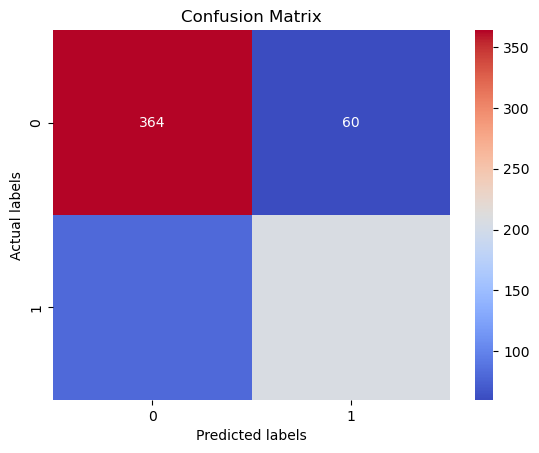

In [164]:
#Ploting confusion matrix with heatmap to get clear picture about model accuracy
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix,annot=True, cmap='coolwarm' , fmt='g', ax=ax, cbar = True);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 


In [165]:
#The count of 0's and 1's in predicted values
y_pred_df["predicted"].value_counts()

predicted
0    445
1    267
Name: count, dtype: int64

In [167]:
from sklearn.metrics import classification_report
print(classification_report(Y_Values,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       424
           1       0.78      0.72      0.75       288

    accuracy                           0.80       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.80      0.80      0.80       712



In [ ]:
# Precison ,Recall, F1-Score all values are good so model is fine. 

In [169]:
#To view the 1-P and P values
Model.predict_proba(X)

array([[0.9161799 , 0.0838201 ],
       [0.68802026, 0.31197974],
       [0.91501714, 0.08498286],
       [0.88771343, 0.11228657],
       [0.43923534, 0.56076466],
       [0.81878917, 0.18121083],
       [0.42578949, 0.57421051],
       [0.76758244, 0.23241756],
       [0.30719128, 0.69280872],
       [0.92349371, 0.07650629],
       [0.61299434, 0.38700566],
       [0.05736734, 0.94263266],
       [0.9393259 , 0.0606741 ],
       [0.15197366, 0.84802634],
       [0.19207366, 0.80792634],
       [0.77049078, 0.22950922],
       [0.85977127, 0.14022873],
       [0.48252697, 0.51747303],
       [0.58561519, 0.41438481],
       [0.75515443, 0.24484557],
       [0.79548988, 0.20451012],
       [0.34387695, 0.65612305],
       [0.11939703, 0.88060297],
       [0.96770111, 0.03229889],
       [0.04300766, 0.95699234],
       [0.86735688, 0.13264312],
       [0.55839918, 0.44160082],
       [0.89857955, 0.10142045],
       [0.8039242 , 0.1960758 ],
       [0.56440222, 0.43559778],
       [0.

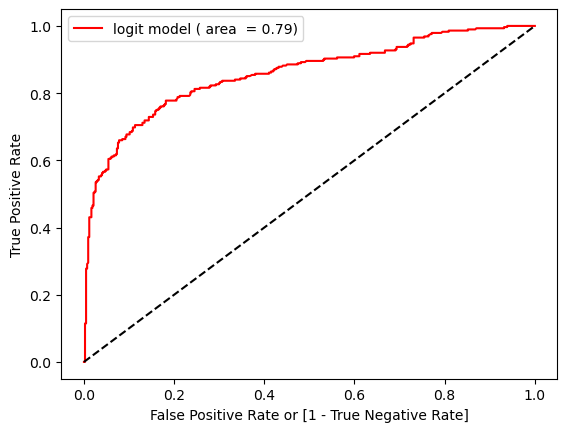

In [172]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_Values, Model.predict_proba (X_Values)[:,1])

auc = roc_auc_score(Y_Values, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [186]:
#Auc value
auc

0.788620283018868

In [187]:
#Auc value is 0.78 then model is Fair

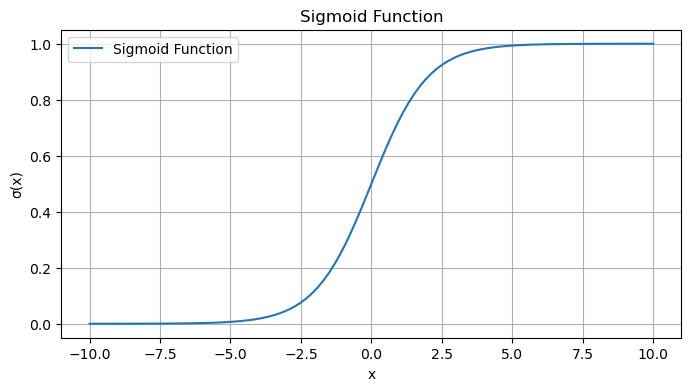

In [173]:
# Python code for generating a sigmoid function graph for visualization
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate an array of x values from -10 to 10
x = np.linspace(-10, 10, 100)

# Compute sigmoid for each x
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.legend()
plt.show()

In [177]:
# Preictions at different thresholds

Model1 = LogisticRegression()
Model1.fit(X_Values,Y_Values)

#Predict the probabilities for X dataset
proba = Model1.predict_proba(X_Values)

# Preict for different thresholds and create a dataframe
i =0.1
j= 0

df_metrics = pd.DataFrame(columns=["Threshold","TPR","precision", "F1", "FPR"])
pred_df = pd.DataFrame({'actual': Y_Values})
                   
while i<= 0.9:
   
    # datafrmae with prections at different thresholds
    col_name = "pred_th_" + str(i)
    pred_df[col_name] = [1 if t >= i else 0 for t in proba[:,1]]
    
    # datframe with performance metrics
    
    TP = len(pred_df[(pred_df["actual"]== 0) & (pred_df[col_name]==0)])
    TN = len(pred_df[(pred_df["actual"]== 1) & (pred_df[col_name]==1)])
    FP = len(pred_df[(pred_df["actual"]== 1) & (pred_df[col_name]==0)])
    FN = len(pred_df[(pred_df["actual"]== 0) & (pred_df[col_name]==1)])
    
    precision = TP/(TP+FP)
    TPR  = TP/(TP+FN)
    FPR = FP/(FP+TN)
    F1 = (2*precision*TPR)/(precision + TPR)
    df_metrics.loc[j] = [i,TPR,precision, F1, FPR]
    
    i += 0.1
    j += 1
    
df_metrics

,Threshold,TPR,precision,F1,FPR
0,0.1,0.268868,0.919355,0.416058,0.034722
1,0.2,0.580189,0.866197,0.694915,0.131944
2,0.3,0.707547,0.857143,0.775194,0.173611
3,0.4,0.794811,0.842500,0.817961,0.218750
4,0.5,0.858491,0.817978,0.837745,0.281250
5,0.6,0.924528,0.796748,0.855895,0.347222
6,0.7,0.971698,0.755963,0.850361,0.461806
7,0.8,0.988208,0.705387,0.823183,0.607639
8,0.9,0.995283,0.650231,0.786580,0.788194


Text(0, 0.5, 'True Positive Rate')

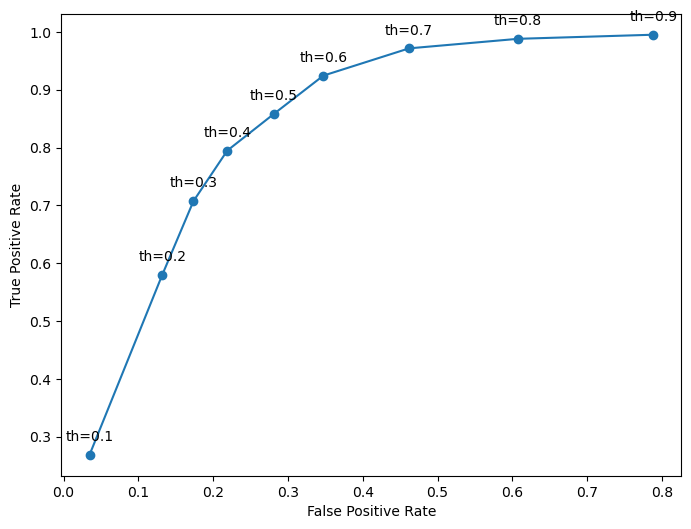

In [178]:
#Plot RoC curve

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
labels = ["th=0.1","th=0.2","th=0.3","th=0.4","th=0.5","th=0.6","th=0.7","th=0.8","th=0.9"]
x=df_metrics["FPR"]
y=df_metrics["TPR"]
plt.scatter(x,y)
plt.plot(x, y)
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [181]:
# Predict Y values in the TestData
TestData["Y"] = Model.predict(X)

C:\Users\gjernes\AppData\Local\Temp\ipykernel_21276\2670545073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData["Y"] = Model.predict(X)


In [182]:
TestData

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Y
0,3,0,34.5,0,0,7.8292,2,0
1,3,1,47.0,1,0,7.0000,0,0
2,2,0,62.0,0,0,9.6875,2,0
3,3,0,27.0,0,0,8.6625,0,0
4,3,1,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
409,3,1,3.0,1,1,13.7750,0,1
411,1,1,37.0,1,0,90.0000,2,1
412,3,1,28.0,0,0,7.7750,0,1
414,1,1,39.0,0,0,108.9000,1,1
